# E-commerce Data Analysis - EDA
## Task 1: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette('husl')

C:\Users\pathe\AppData\Local\Temp\ipykernel_8076\2543216349.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Loading and Initial Data Exploration

In [2]:
# Load datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Convert date columns
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

### Customer Analysis

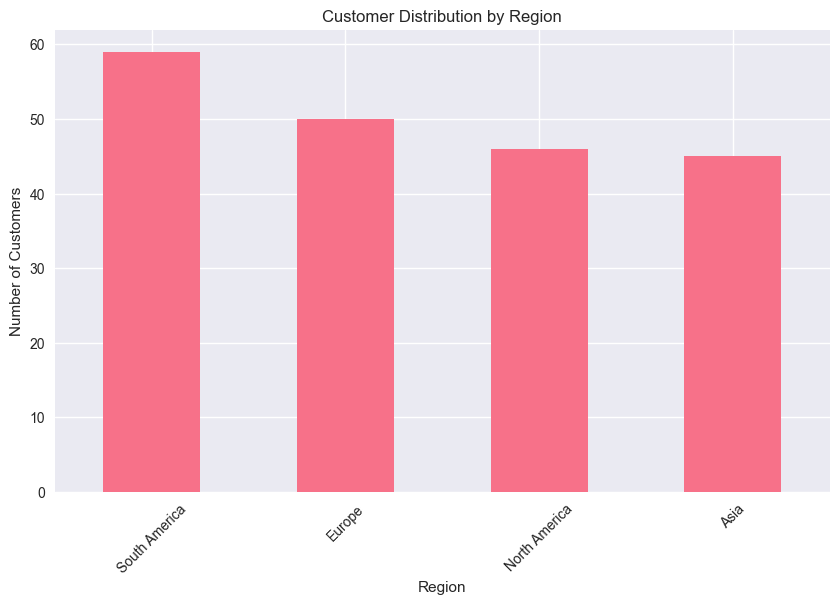

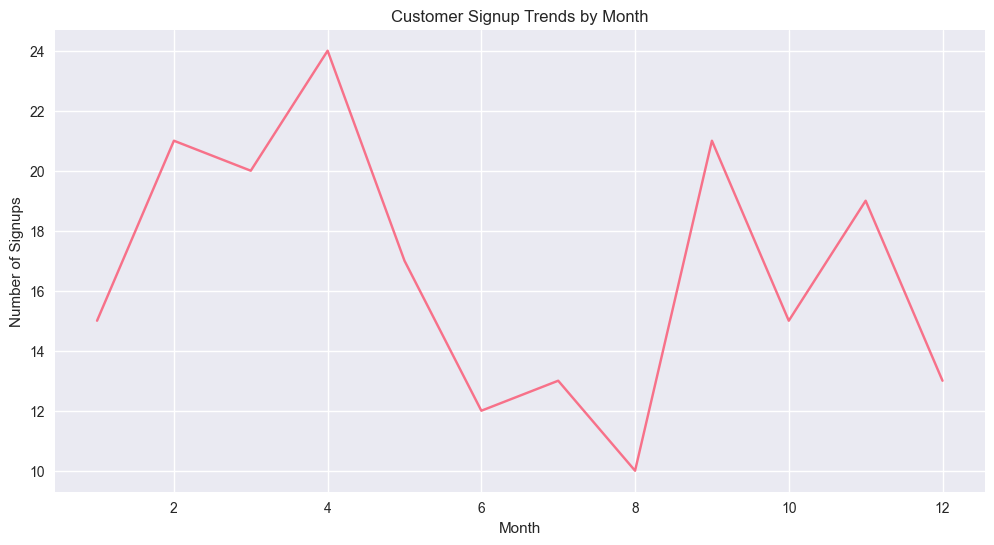

In [3]:
# Regional distribution
plt.figure(figsize=(10, 6))
customers_df['Region'].value_counts().plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Customer signup trends
plt.figure(figsize=(12, 6))
customers_df['SignupDate'].dt.month.value_counts().sort_index().plot(kind='line')
plt.title('Customer Signup Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()

### Product Analysis

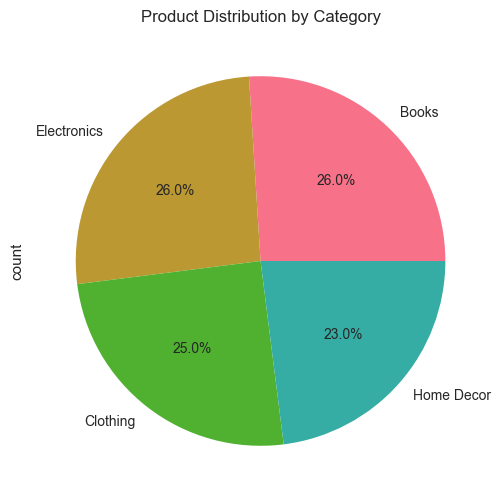

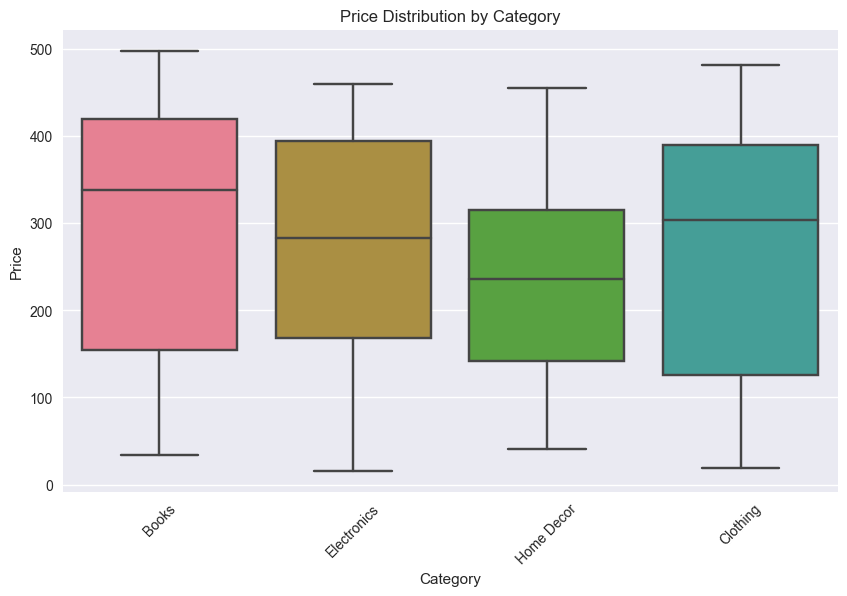

In [4]:
# Category distribution
plt.figure(figsize=(10, 6))
products_df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Distribution by Category')
plt.show()

# Price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=products_df)
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

### Transaction Analysis

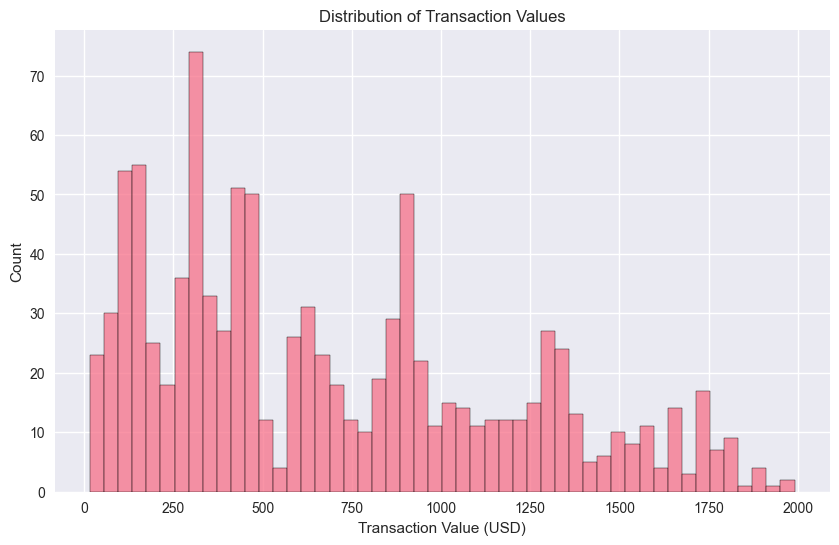

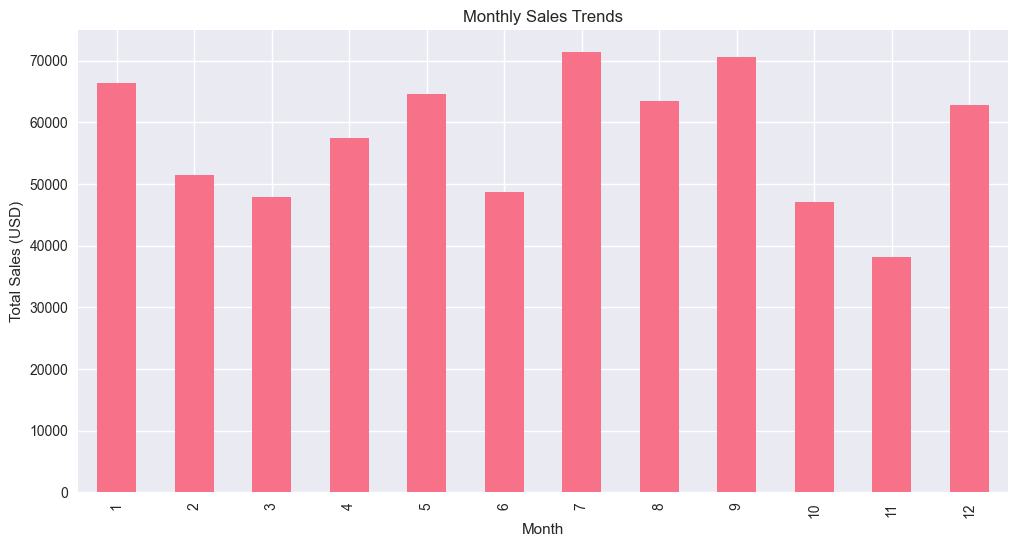

In [5]:
# Transaction value distribution
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['TotalValue'], bins=50)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value (USD)')
plt.show()

# Monthly sales trends
monthly_sales = transactions_df.groupby(transactions_df['TransactionDate'].dt.month)['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.show()

### Customer Purchase Behavior

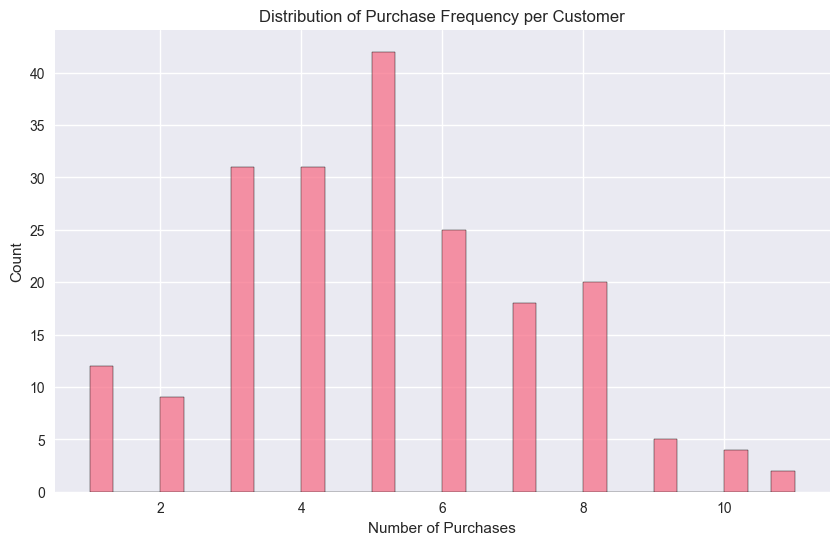

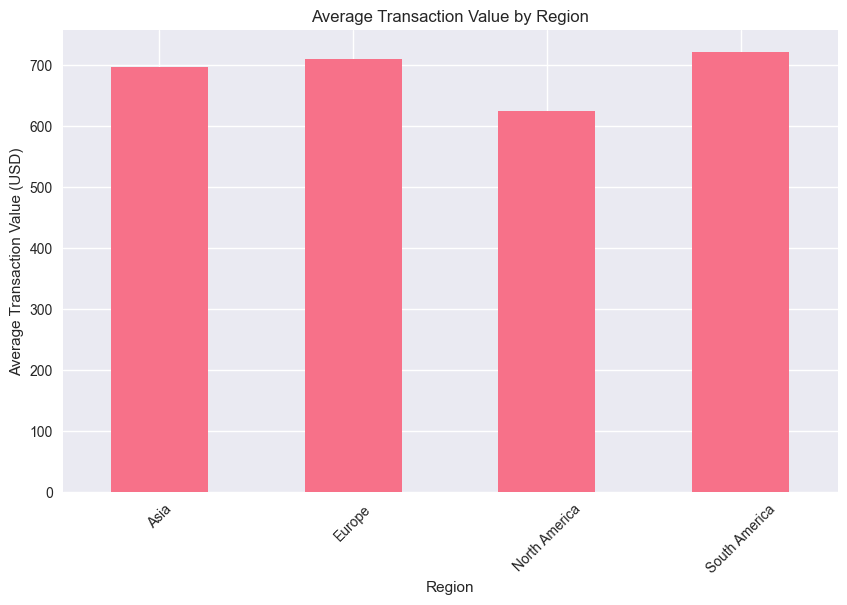

In [6]:
# Customer purchase frequency
customer_frequency = transactions_df['CustomerID'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(customer_frequency, bins=30)
plt.title('Distribution of Purchase Frequency per Customer')
plt.xlabel('Number of Purchases')
plt.show()

# Average transaction value by region
avg_value_by_region = transactions_df.merge(customers_df, on='CustomerID').groupby('Region')['TotalValue'].mean()
plt.figure(figsize=(10, 6))
avg_value_by_region.plot(kind='bar')
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.xticks(rotation=45)
plt.show()